Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV


# File system management
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

Import the training dataset

In [2]:
df_train = pd.read_csv('tripadvisor_hotel_reviews.csv')
df_train.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df_train['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

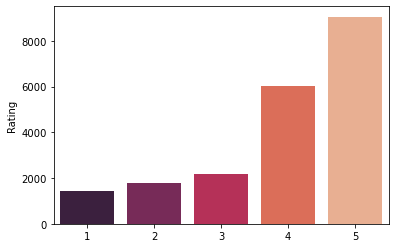

In [5]:
sns.barplot(df_train['Rating'].value_counts().index, df_train['Rating'].value_counts(), palette = 'rocket')

In [6]:
five_star = df_train[df_train['Rating'] == 5]['Review']
five_star.values[1]

"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, great walk did n't mind, right christmas wonderful lights, homeless stowed away building entrances leave, police presence not greatest area stadium, activities 7 blocks pike street waterfront great coffee shops way, hotel mantained foyer awesome, wine tasting available evening, best dog, taking st. bernard time family, safes hotel located service desk room, bathroom huge jetted tub huge, funny house ke

In [7]:
four_star = df_train[df_train['Rating'] == 2]['Review']
four_star.values[1]

"poor value stayed monaco seattle july, nice hotel priced 100- 150 night not, hotel takes beating quotient, experience simply average, nothing exceptional paying 300+ n't ca n't terribly disappointed, wife stayed nicest suites 200/night felt like overpaying, best advice shop, quality-wise league average marriott nice best western,  "

In [8]:
df_train['Review'][:5]

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

In [9]:
def clean_text(Review):
    Review = Review.lower()
    Review = re.sub('\[.*?\]', '', Review)
    Review = re.sub('https?://\S+|www\.\S+', '', Review)
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub('[%s]' % re.escape(string.punctuation), '', Review)
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    
    return Review

df_train['Review'] = df_train['Review'].apply(lambda x: clean_text(x))

df_train['Review'].head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not  experience hotel monaco seattl...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: Review, dtype: object

WordCloud

In [10]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

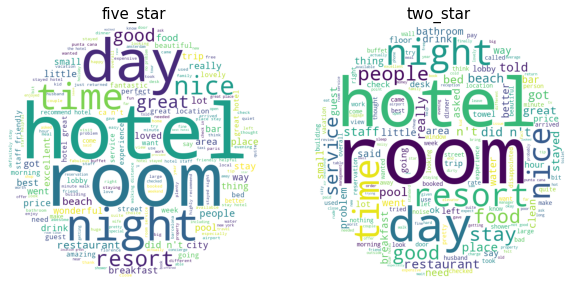

In [11]:
from wordcloud import WordCloud

char_mask = np.array(Image.open("1148109.png"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [10, 10])
wordcloud1 = WordCloud(background_color = 'white', width = 600, height = 400, mask = char_mask).generate(" ".join(five_star))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('five_star', fontsize = 15)

wordcloud2 = WordCloud( background_color='white', width=600, height=400, mask = char_mask).generate(" ".join(four_star))


ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('two_star', fontsize = 15)
plt.savefig('hotel')

Tokenizing the training

In [12]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_train['Review'] = df_train['Review'].apply(lambda x: tokenizer.tokenize(x))
df_train['Review'].head()

0    [nice, hotel, expensive, parking, got, good, d...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, rooms, not, experience, hotel, monaco, ...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

Stopwords removal

In [13]:
def remove_stopwords(description):
    words = [w for w in description if w not in stopwords.words('english')]
    return words

df_train['Review'] = df_train['Review'].apply(lambda x: remove_stopwords(x))

df_train.head()

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",4
1,"[ok, nothing, special, charge, diamond, member...",2
2,"[nice, rooms, experience, hotel, monaco, seatt...",3
3,"[unique, great, stay, wonderful, time, hotel, ...",5
4,"[great, stay, great, stay, went, seahawk, game...",5


Token normalization

In [14]:
text = 'feet cats wolves talked'

tokenizer = nltk.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

#stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

#lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

Stemming the sentence:  feet cat wolv talk
Lemmatizing the sentence:  foot cat wolf talked


In [15]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df_train['Review'] = df_train['Review'].apply(lambda x: combine_text(x))

df_train['Review']
df_train.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms experience hotel monaco seattle goo...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


Getting it all together - A Text Preprocessing function

In [16]:
def text_preprocessing(ingredients):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(ingredients)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

Natural Language Processing Classification Task

In [17]:
hotel_class=df_train[(df_train.Rating==1)|(df_train.Rating)]

Create two objects X and y

In [18]:
X = hotel_class['Review']
y = hotel_class['Rating']

Transforming tokens to a vector Bag of words

In [19]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(hotel_class['Review'])

split our data into training and testing data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Import MultinomialNB

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

Now fit nb

In [23]:
nb.fit(X_train, y_train)

MultinomialNB()

Predictions and Evaluations 

In [24]:
prediction=nb.predict(X_test)


Create a confusion matrix and classification report

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
print(confusion_matrix(y_test,prediction))

[[ 116  144   13  113   38]
 [  21  103   20  311   77]
 [   2   22   14  474  151]
 [   0   13    4  836  955]
 [   2    2    3  375 2339]]


In [27]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.82      0.27      0.41       424
           2       0.36      0.19      0.25       532
           3       0.26      0.02      0.04       663
           4       0.40      0.46      0.43      1808
           5       0.66      0.86      0.74      2721

    accuracy                           0.55      6148
   macro avg       0.50      0.36      0.37      6148
weighted avg       0.52      0.55      0.51      6148



Using XGBoost algorithm to optimize the result

In [28]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Prediction the Test set results

In [29]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[ 236,  111,   18,   23,   36],
       [  92,  163,   77,  128,   72],
       [  25,   72,  128,  325,  113],
       [   9,   15,   78,  894,  812],
       [   7,   10,   20,  484, 2200]])